In [1]:

import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_2838.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/River_2085.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_205.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_2038.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_1235.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_344.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_2181.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_2210.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_2486.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/Forest_1277.jpg
/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees/River_1693.jpg
/kaggle/input/

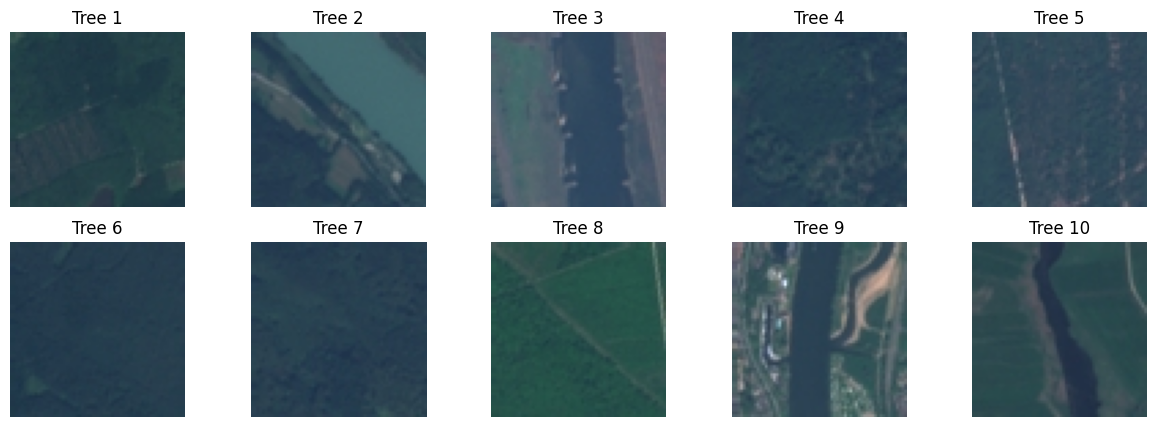

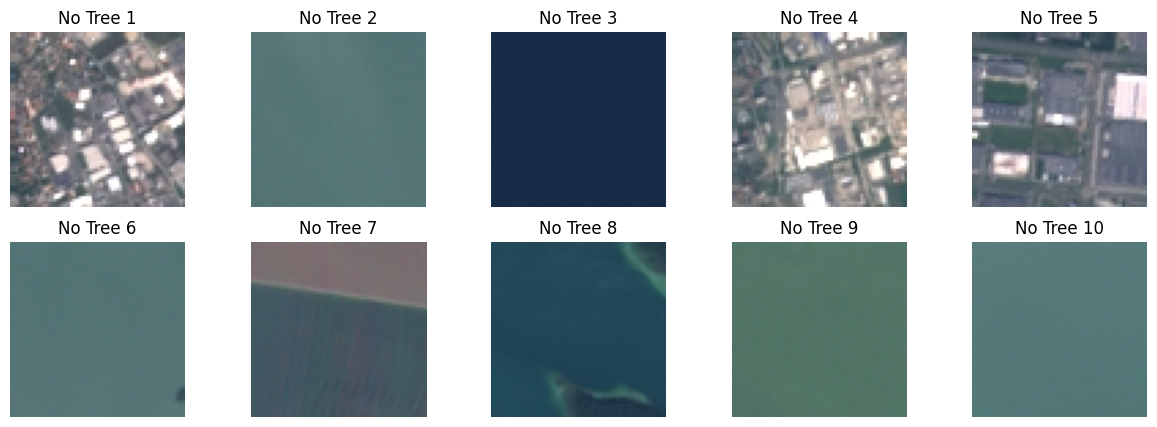

In [2]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the paths to the folders
tree_folder = '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees'
notree_folder = '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/NoTrees'

# Function to display random images from a folder
def display_random_images(folder, class_name, num_images=10):
    # Get list of all images in the folder
    images = os.listdir(folder)
    
    # Randomly select 'num_images' images
    random_images = random.sample(images, num_images)
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        plt.subplot(2, 5, i+1)
        img = imread(os.path.join(folder, image_name))
        plt.imshow(img)
        plt.title(f'{class_name} {i+1}')
        plt.axis('off')
    plt.show()

# Display 10 random images from the "tree" folder
display_random_images(tree_folder, 'Tree')

# Display 10 random images from the "notree" folder
display_random_images(notree_folder, 'No Tree')

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [4]:
tree_folder = '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/Trees'
notree_folder = '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery/NoTrees'

In [5]:
# Load image paths and labels
tree_images = [os.path.join(tree_folder, img) for img in os.listdir(tree_folder)]
notree_images = [os.path.join(notree_folder, img) for img in os.listdir(notree_folder)]

In [6]:
# Create labels (1 for tree, 0 for notree)
X = tree_images + notree_images
y = [1] * len(tree_images) + [0] * len(notree_images)

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and X_test are lists of file paths to the images.
# y_train and y_test are lists of labels corresponding to the images.
# E.G
# X_train = ["image1.jpg", "image2.jpg", "image3.jpg"]
# y_train = [1, 0, 1] (1 for "tree", 0 for "notree")

In [8]:
# Function to load and preprocess images
def load_and_preprocess_image(path, img_size=(64, 64)):
    # Read the image file
    img = tf.io.read_file(path)
    # Decode the JPEG image
    img = tf.image.decode_jpeg(img, channels=3)
    # Resize the image
    img = tf.image.resize(img, img_size)
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    return img

In [9]:
# Prepare datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(lambda x, y: (load_and_preprocess_image(x), y))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(lambda x, y: (load_and_preprocess_image(x), y))
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [10]:
# Verify the dataset
for images, labels in train_dataset.take(1):
    print("Image shape:", images.shape)  # Should print (32, 64, 64, 3)
    print("Labels:", labels.numpy())    # Should print an array of 0s and 1s

Image shape: (32, 64, 64, 3)
Labels: [1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0]


In [11]:
# define function to Visualize a few images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

Training Dataset Images:


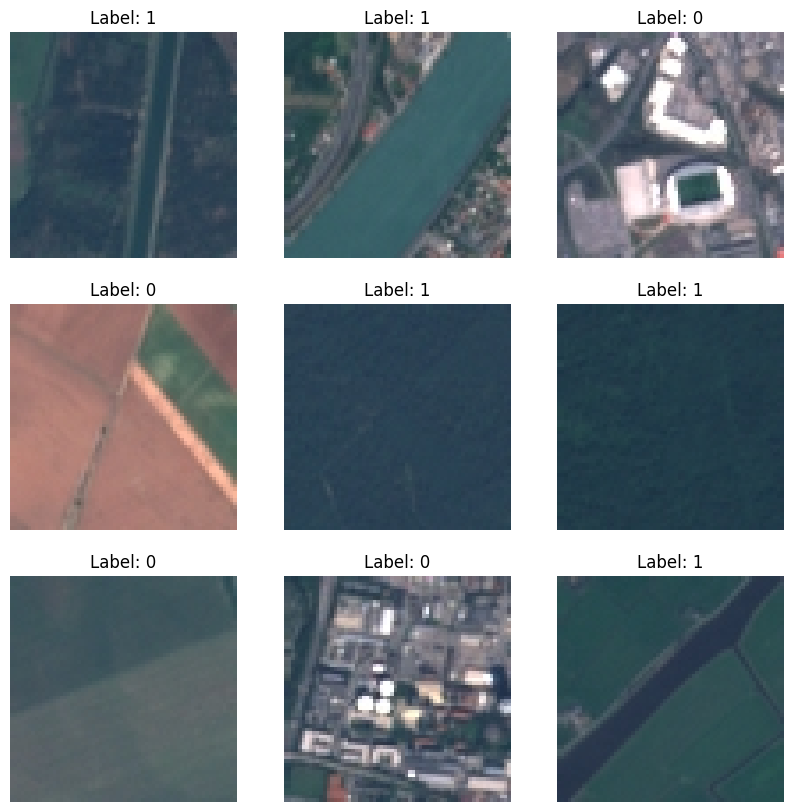

In [12]:
# Visualize images from the training dataset
print("Training Dataset Images:")
for images, labels in train_dataset.take(1):
    plot_images(images.numpy(), labels.numpy())

Testing Dataset Images:


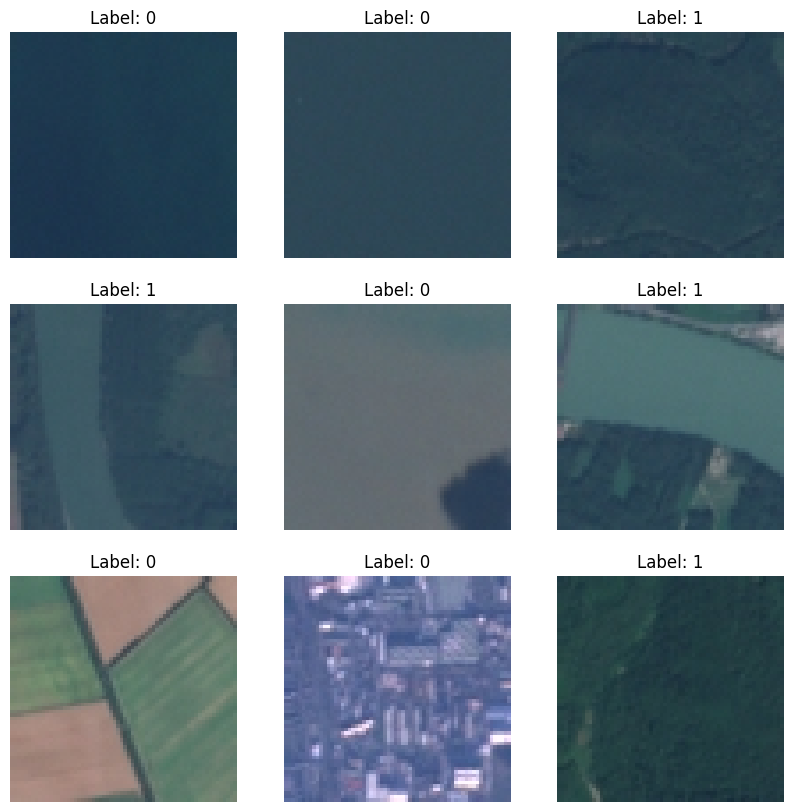

In [13]:
# Visualize images from the testing dataset
print("Testing Dataset Images:")
for images, labels in test_dataset.take(1):
    plot_images(images.numpy(), labels.numpy())

In [14]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Train the model
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=test_dataset)

#Training accuracy is the percentage of correctly classified samples in the training dataset during training.
#Training Accuracy = (number of coreect predictions/Total number of samples) * 100

#Training loss Measures how well the model is minimizing the error on the training data.
#A decreasing training loss indicates that the model is learning.
#If the training loss is very low but the validation loss is high, it might indicate overfitting.


#Validation Accuracy Measures how well the model generalizes to unseen data (the validation dataset).
#Validation Accuracy = (number of coreect predictions/Total number of samples) * 100
#High validation accuracy indicates that the model is performing well on data it has never seen before.
#If validation accuracy is much lower than training accuracy, it might indicate overfitting.

#Validation Loss Measures how well the model is minimizing the error on unseen data.
#A decreasing validation loss indicates that the model is generalizing well.
#If the validation loss starts increasing while the training loss continues to decrease, it indicates overfitting.

# Good Performance:
# Training accuracy and validation accuracy are both high and close to each other.
# Training loss and validation loss are both low and decreasing.

# Overfitting:
# Training accuracy is very high, but validation accuracy is significantly lower.
# Training loss is very low, but validation loss is high or increasing.

# Underfitting:
# Both training accuracy and validation accuracy are low.
# Both training loss and validation loss are high.

# Ideal Scenario:
# Training accuracy and validation accuracy are both high and close to each other.
# Training loss and validation loss are both low and stable.

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 29s 106ms/step - accuracy: 0.7496 - loss: 0.4735 - val_accuracy: 0.8659 - val_loss: 0.3407
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.8800 - loss: 0.3175 - val_accuracy: 0.8933 - val_loss: 0.2663
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - accuracy: 0.8963 - loss: 0.2750 - val_accuracy: 0.9115 - val_loss: 0.2203
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9082 - loss: 0.2317 - val_accuracy: 0.9322 - val_loss: 0.1737
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 99ms/step - accuracy: 0.9177 - loss: 0.2112 - val_accuracy: 0.9481 - val_loss: 0.1500
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9280 - loss: 0.1879 - val_accuracy: 0.9471 - val_loss: 0.1517
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.9347 - loss: 0.1686 - val_accuracy: 0.9481 - val_loss: 0.1369
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 26s 100ms/step - accuracy: 0.9404 - loss: 0.

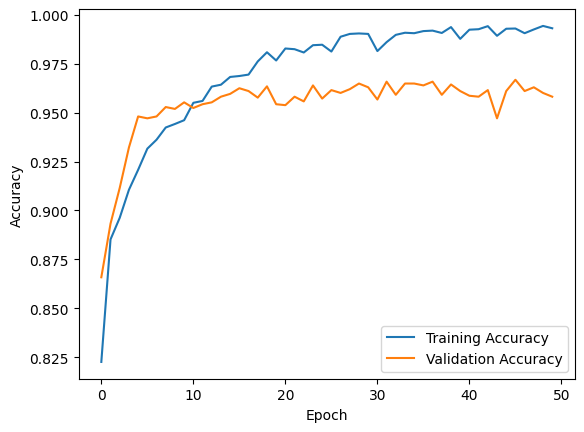

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

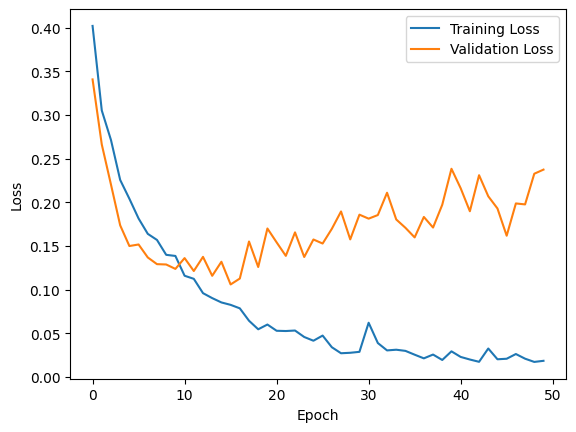

In [19]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Dataset Preparation:

Mix all images (5,200 "tree" + 5,200 "notree" = 10,400 images).

Split into:

Training Set (80% = 8,320 images).

Testing Set (20% = 2,080 images).

Training:

Apply data augmentation to the training set.

Train the model on the training set.

Use the validation set (if available) to monitor performance and tune hyperparameters.


Deployment:

If the model performs well on the testing set, it can be deployed to make predictions on new, unseen data.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=40,   # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom in/out by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Load and augment the training data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery',  # Directory containing "Trees" and "NoTrees" folders
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Number of images per batch
    class_mode='binary'  # Binary classification
)

# Prepare the testing dataset (no augmentation)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery',  # Directory containing "Trees" and "NoTrees" folders
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Number of images per batch
    class_mode='binary'  # Binary classification
)

Found 10400 images belonging to 2 classes.
Found 10400 images belonging to 2 classes.


In [21]:
import matplotlib.pyplot as plt

# Function to display sample images from a generator
def display_sample_images(generator, title, num_images=10):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)
    
    # Plot the images
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis('off')
    plt.show()

Augmented Training Images:


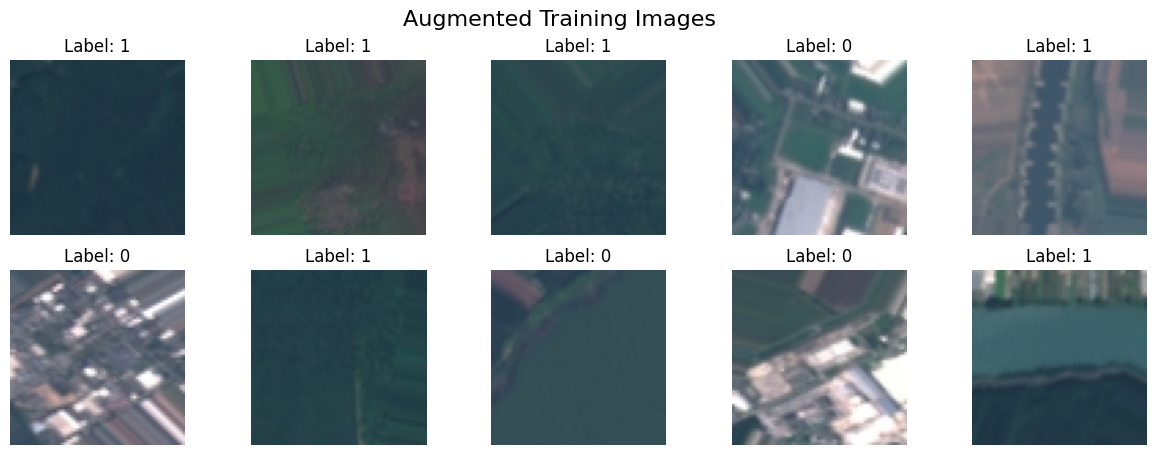

In [22]:
# Display 10 augmented images from the training dataset
print("Augmented Training Images:")
display_sample_images(train_generator, "Augmented Training Images")

Non-Augmented Testing Images:


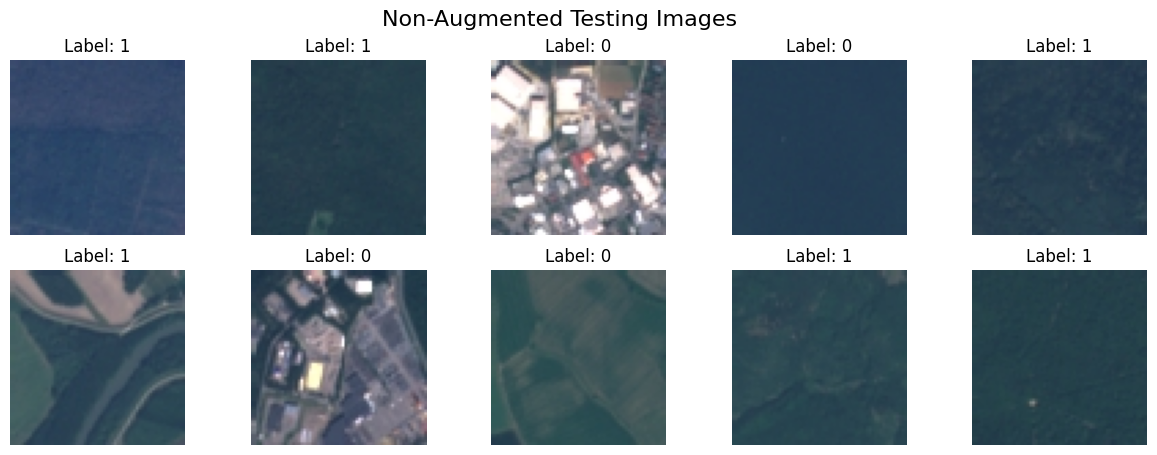

In [23]:
# Display 10 non-augmented images from the testing dataset
print("Non-Augmented Testing Images:")
display_sample_images(test_generator, "Non-Augmented Testing Images")

In [24]:
# Train the model with augmented data
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=test_generator)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


325/325 ━━━━━━━━━━━━━━━━━━━━ 62s 187ms/step - accuracy: 0.9348 - loss: 0.2296 - val_accuracy: 0.9787 - val_loss: 0.0598
Epoch 2/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 183ms/step - accuracy: 0.9468 - loss: 0.1381 - val_accuracy: 0.9707 - val_loss: 0.0778
Epoch 3/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 182ms/step - accuracy: 0.9418 - loss: 0.1669 - val_accuracy: 0.9789 - val_loss: 0.0600
Epoch 4/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 183ms/step - accuracy: 0.9553 - loss: 0.1287 - val_accuracy: 0.9698 - val_loss: 0.0725
Epoch 5/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 61s 185ms/step - accuracy: 0.9565 - loss: 0.1184 - val_accuracy: 0.9783 - val_loss: 0.0609
Epoch 6/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 183ms/step - accuracy: 0.9565 - loss: 0.1127 - val_accuracy: 0.9727 - val_loss: 0.0685
Epoch 7/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 182ms/step - accuracy: 0.9606 - loss: 0.1125 - val_accuracy: 0.9699 - val_loss: 0.0878
Epoch 8/50
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 183ms/step - accuracy: 0.9586 - loss: 0.1146 - val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

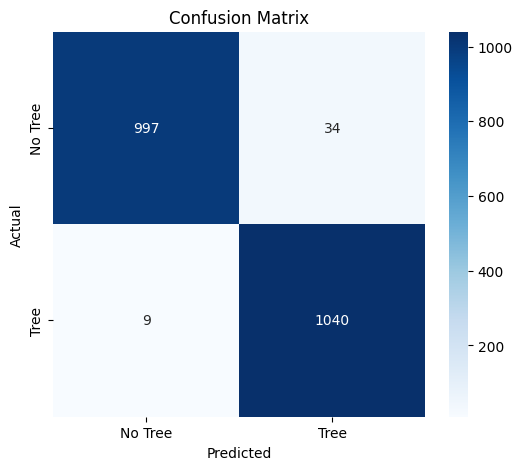

In [25]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test set
y_true = []
y_pred = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype(int).flatten()
    y_pred.extend(predicted_labels)
    y_true.extend(labels.numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tree', 'Tree'], yticklabels=['No Tree', 'Tree'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
#Model Performance Metrics (Accuracy, Precision, Recall, F1 Score)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print evaluation metrics
print(f"Model Accuracy  : {accuracy:.4f}")
print(f"Model Precision : {precision:.4f}")
print(f"Model Recall    : {recall:.4f}")
print(f"Model F1 Score  : {f1:.4f}")


Model Accuracy  : 0.9793
Model Precision : 0.9683
Model Recall    : 0.9914
Model F1 Score  : 0.9797


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

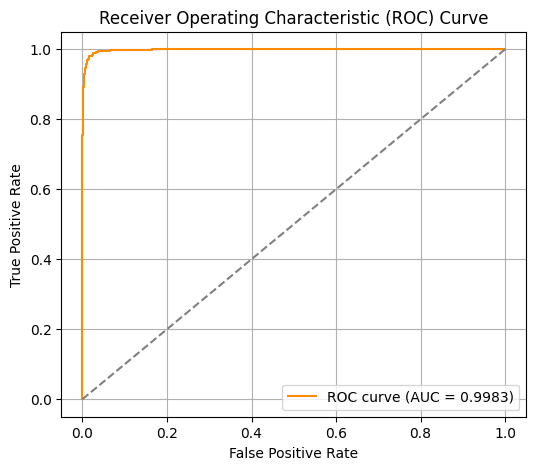

In [27]:
#ROC Curve

from sklearn.metrics import roc_curve, auc

# Generate ROC Curve
y_probs = []  # Probabilities from the model
for images, _ in test_dataset:
    probs = model.predict(images).flatten()
    y_probs.extend(probs)

fpr, tpr, _ = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


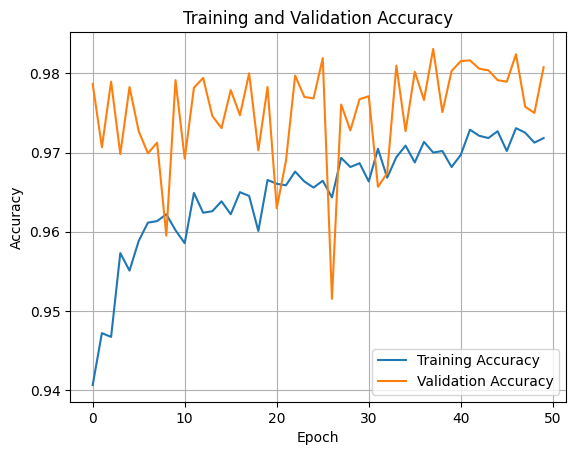

In [28]:
# Plot training and validation accuracy - Model Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

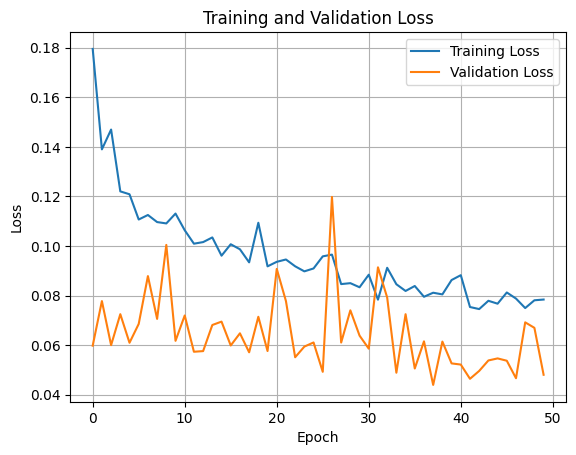

In [29]:
# Plot training and validation loss - Model Loss
# Plot how training and validation loss changed over the epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Found 10400 images belonging to 2 classes.


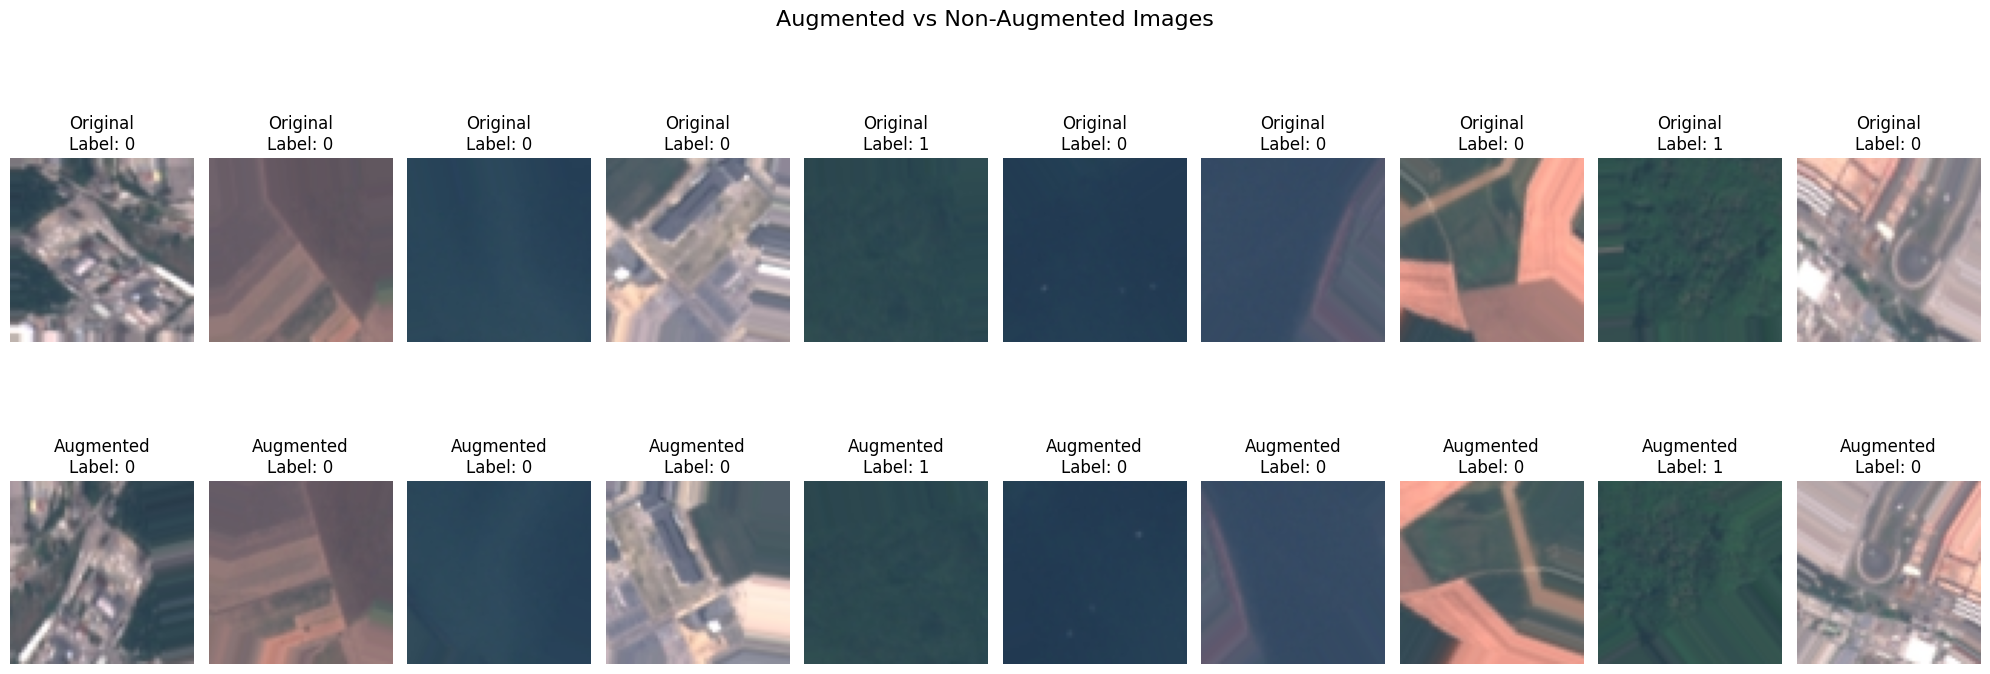

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=40,   # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    shear_range=0.2,  # Apply shear transformations
    zoom_range=0.2,  # Randomly zoom in/out by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Load and augment the training data
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/trees-in-satellite-imagery/Trees in Satellite Imagery',  # Directory containing "Trees" and "NoTrees" folders
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,  # Number of images per batch
    class_mode='binary'  # Binary classification
)

# Function to display augmented vs non-augmented images
def display_augmented_vs_original(train_generator, num_images=10):
    # Fetch a batch of augmented images and labels
    augmented_images, labels = next(train_generator)
    
    # Fetch the same batch of non-augmented images
    non_augmented_images = train_generator[0][0]  # First batch, images only
    
    # Plot the images
    plt.figure(figsize=(20, 8))
    plt.suptitle("Augmented vs Non-Augmented Images", fontsize=16)
    
    for i in range(num_images):
        # Display non-augmented image
        plt.subplot(2, num_images, i + 1)
        plt.imshow(non_augmented_images[i])
        plt.title(f"Original\nLabel: {int(labels[i])}")
        plt.axis('off')
        
        # Display augmented image
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(augmented_images[i])
        plt.title(f"Augmented\nLabel: {int(labels[i])}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display 10 augmented vs non-augmented images
display_augmented_vs_original(train_generator)

In [31]:
# Save the model as an HDF5 file
model.save('deforestation_model.h5')

In [32]:
import joblib

# Save the model
joblib.dump(model, 'deforestation_model.joblib')

['deforestation_model.joblib']

In [33]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [34]:
# Function to load and preprocess a single image
def load_and_preprocess_single_image(path, img_size=(64, 64)):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, img_size)
    img = img / 255.0
    return img

In [35]:
# Get a list of all test images
test_images = X_test

In [36]:
# Randomly select 10 images from the test dataset
random_test_images = random.sample(test_images, 10)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


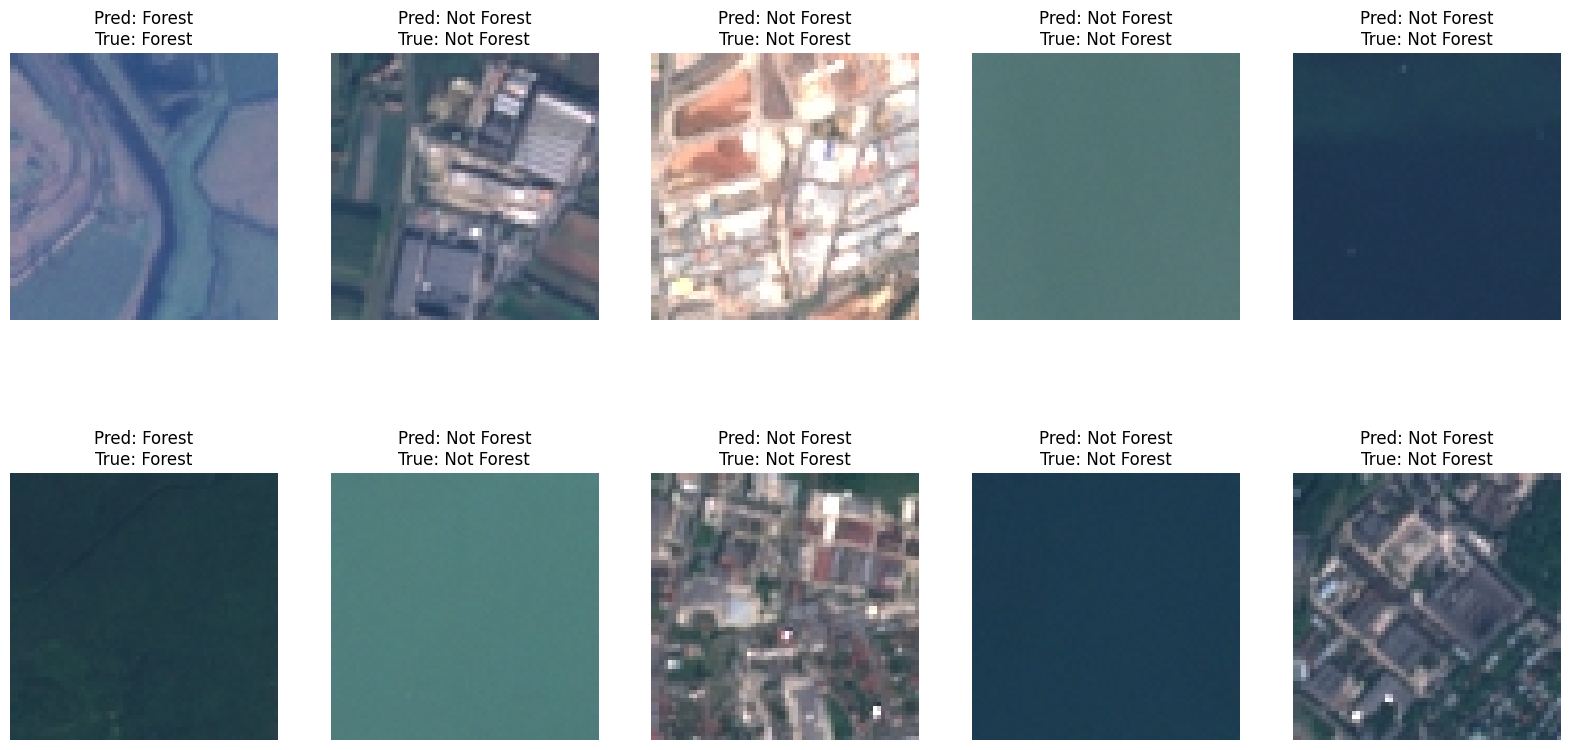

In [37]:
# Display the selected images and make predictions
plt.figure(figsize=(20, 10))
for i, img_path in enumerate(random_test_images):
    # Load and preprocess the image
    img = load_and_preprocess_single_image(img_path)
    
    # Display the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    
    # Make a prediction
    img_array = tf.expand_dims(img, 0)  # Add batch dimension
    prediction = model.predict(img_array)
    predicted_label = "Forest" if prediction > 0.5 else "Not Forest"
    
    # Get the true label
    true_label = "Forest" if y_test[X_test.index(img_path)] == 1 else "Not Forest"
    
    # Set the title with prediction and true label
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
    

In [38]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>